In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('UMTMVS.csv')

In [3]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


### Setting DATE column as index column 

In [4]:
df=df.set_index('DATE')

In [5]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [10]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

#### Index(date) is now in object data type mode we need to convert it to date time format

In [11]:
df.index=pd.to_datetime(df.index)

In [13]:
df.index #checking now to see if date is in date time format

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

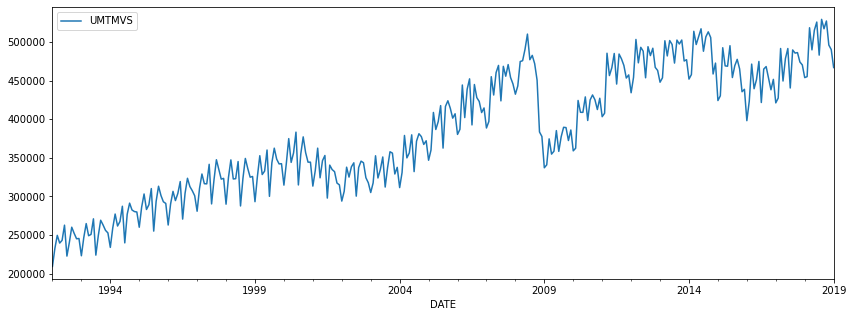

In [17]:
df.plot(figsize=(14,5));

### Obserivng the changes in from start of 2009 to start of 2019

In [19]:
100*(df.loc['2019-01-01']-df.loc['2009-01-01'])/df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

### Obserivng the changes in from start of 2008 to start of 2009

In [20]:
100*(df.loc['2009-01-01']-df.loc['2008-01-01'])/df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

### Month with the min value after 2005

In [21]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

### Taking the 6 months which have the highest value

In [24]:
df.sort_values(by='UMTMVS',ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


### **How much of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [25]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

### avg value in millions of dollors per year

<AxesSubplot:xlabel='DATE'>

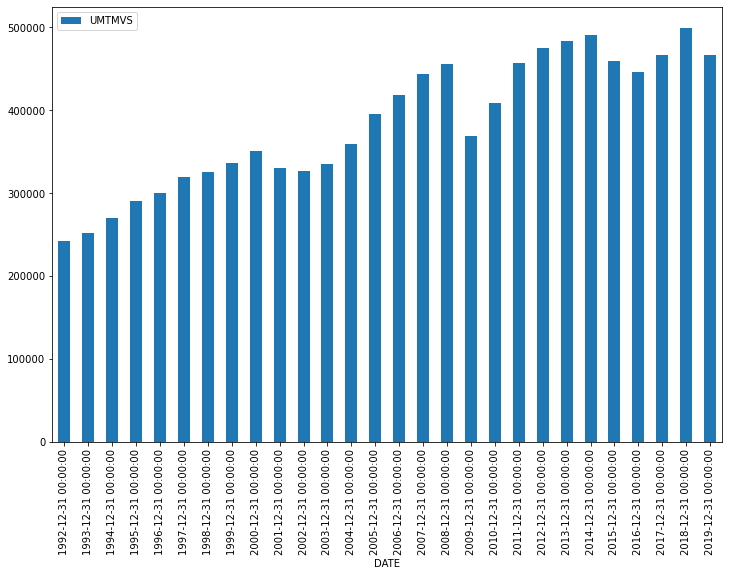

In [26]:
df.resample('Y').mean().plot.bar(figsize=(12,8))

### What year had the biggest increase in mean value from the previous year's mean value?

In [27]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

In [28]:
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [29]:
yearly_data_shift.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333


In [30]:
change = yearly_data - yearly_data_shift 

In [31]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

#### Plotting out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!

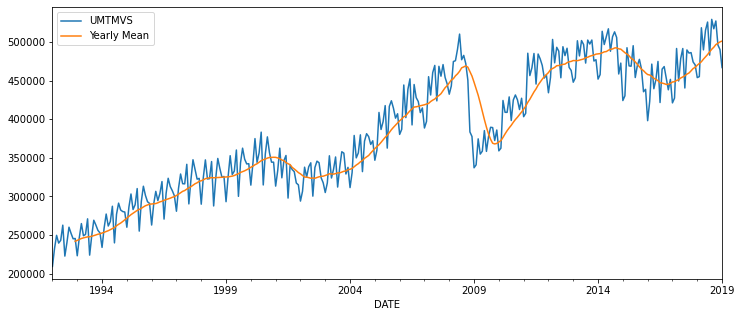

In [32]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [33]:
df

,UMTMVS,Yearly Mean
DATE,,
1992-01-01,209438.0,NaN
1992-02-01,232679.0,NaN
1992-03-01,249673.0,NaN
1992-04-01,239666.0,NaN
1992-05-01,243231.0,NaN
...,...,...
2018-09-01,516992.0,493075.583333
2018-10-01,527031.0,496482.333333
2018-11-01,495901.0,498308.833333


#### Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) 

In [34]:
# reading data again as we did manipulations on it

In [35]:
df=pd.read_csv('UMTMVS.csv',index_col='DATE',parse_dates=True)

In [36]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [37]:
df2008 = df.loc['2008-01-01':'2009-01-01']

In [39]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [40]:
df2008.max()

UMTMVS    510081.0
dtype: float64

#### post peak

In [41]:
dfPost_peak = df.loc['2008-06-01':]

In [43]:
dfPost_peak[dfPost_peak>=510081].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [44]:
len(df.loc['2008-06-01':'2014-03-01'])

70

Took 70 months to reach the same peak after the fall